In [10]:
import pandas as pd
import numpy as np
from scipy.signal.windows import gaussian
import matplotlib.pyplot as plt

In [2]:
df = pd.read_pickle('stocks.pkl')
aal = df.xs('AAL').copy()
aal

,open,high,low,close,volume
date,,,,,
2013-02-08,15.07,15.12,14.63,14.75,8407500
2013-02-11,14.89,15.01,14.26,14.46,8882000
2013-02-12,14.45,14.51,14.10,14.27,8126000
2013-02-13,14.30,14.94,14.25,14.66,10259500
2013-02-14,14.94,14.96,13.16,13.99,31879900
...,...,...,...,...,...
2018-02-01,54.00,54.64,53.59,53.88,3623078
2018-02-02,53.49,53.99,52.03,52.10,5109361
2018-02-05,51.99,52.39,49.75,49.76,6878284


Lets say we want to looking at a rolling window over the course of a 5 open days, looking at the closing values of the security.

## Rolling

In [3]:
aal['RollingMean'] = aal.close.rolling(window=5).mean()
aal

,open,high,low,close,volume,RollingMean
date,,,,,,
2013-02-08,15.07,15.12,14.63,14.75,8407500,NaN
2013-02-11,14.89,15.01,14.26,14.46,8882000,NaN
2013-02-12,14.45,14.51,14.10,14.27,8126000,NaN
2013-02-13,14.30,14.94,14.25,14.66,10259500,NaN
2013-02-14,14.94,14.96,13.16,13.99,31879900,14.426
...,...,...,...,...,...,...
2018-02-01,54.00,54.64,53.59,53.88,3623078,53.308
2018-02-02,53.49,53.99,52.03,52.10,5109361,53.114
2018-02-05,51.99,52.39,49.75,49.76,6878284,52.530


In [4]:
aal['RollingCenterMean'] = aal.close.rolling(window=5, center=True).mean()
aal

,open,high,low,close,volume,RollingMean,RollingCenterMean
date,,,,,,,
2013-02-08,15.07,15.12,14.63,14.75,8407500,NaN,NaN
2013-02-11,14.89,15.01,14.26,14.46,8882000,NaN,NaN
2013-02-12,14.45,14.51,14.10,14.27,8126000,NaN,14.426
2013-02-13,14.30,14.94,14.25,14.66,10259500,NaN,14.376
2013-02-14,14.94,14.96,13.16,13.99,31879900,14.426,14.336
...,...,...,...,...,...,...,...
2018-02-01,54.00,54.64,53.59,53.88,3623078,53.308,52.530
2018-02-02,53.49,53.99,52.03,52.10,5109361,53.114,52.248
2018-02-05,51.99,52.39,49.75,49.76,6878284,52.530,51.664


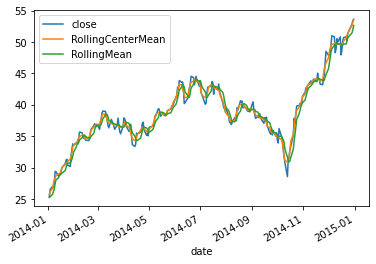

In [6]:
aal.loc['2014'].reset_index().plot(x='date', y=['close', 'RollingCenterMean', 'RollingMean']);

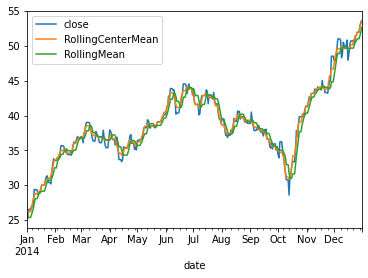

In [7]:
new_index = pd.date_range(aal.index.min(), aal.index.max(), name='date')
aal2 = aal.reindex(new_index, method='ffill')
aal2.loc['2014'].reset_index().plot(x='date', y=['close', 'RollingCenterMean', 'RollingMean']);

## Window Functions

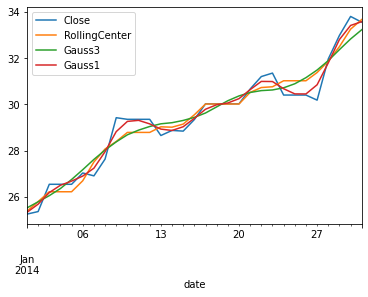

In [9]:
aal2['Gauss3'] = aal2.close.rolling(window=9, win_type='gaussian', center=True).mean(std=3)
aal2['Gauss1'] = aal2.close.rolling(window=9, win_type='gaussian', center=True).mean(std=1)

ax = aal2.loc['2014-01'].reset_index().plot(x='date', y='close', label='Close');
aal2.loc['2014-01'].reset_index().plot(x='date', y='RollingCenterMean', ax=ax, label='RollingCenter');
aal2.loc['2014-01'].reset_index().plot(x='date', y='Gauss3', ax=ax, label='Gauss3');
aal2.loc['2014-01'].reset_index().plot(x='date', y='Gauss1', ax=ax, label='Gauss1');

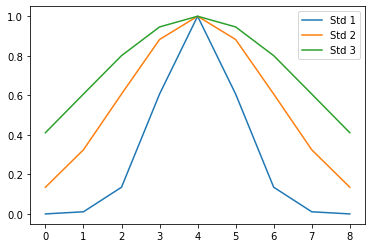

In [11]:
# std?
xs = np.arange(9)
plt.plot(xs, gaussian(9, std=1), label='Std 1')
plt.plot(xs, gaussian(9, std=2), label='Std 2')
plt.plot(xs, gaussian(9, std=3), label='Std 3')
plt.legend();